In [12]:
import tensorflow as tf

## load image
from PIL import Image 
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from tensorflow.keras import datasets, layers, models


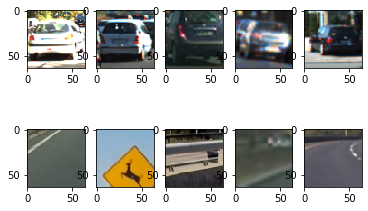

In [15]:
## view some image
vehicle_folder=r'data/vehicles/'
nonvehicle_folder = r'data/non-vehicles'
for i in range(5):
    file1 = random.choice(os.listdir(vehicle_folder))
    file2 = random.choice(os.listdir(nonvehicle_folder))
    image1_path = os.path.join(vehicle_folder, file1)
    image2_path = os.path.join(nonvehicle_folder, file2)
    img1=mpimg.imread(image1_path)
    ax=plt.subplot(2,5,i+1)
    plt.imshow(img1)
    img2=mpimg.imread(image2_path)
    ax=plt.subplot(2,5,5+i+1)
    plt.imshow(img2)
    
## first row: vehicle/ second row: non-vehicle

In [7]:
## load image

def create_dataset_PIL(img_folder):   
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        if dir1=='.DS_Store':
            continue
        for file in os.listdir(os.path.join(img_folder, dir1)):     
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            # transform to float
            image = image.astype('float32')
            # normalize
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name

PIL_img_data, class_name=create_dataset_PIL(img_folder)

In [9]:
## this is 64*64 image
PIL_img_data[0].shape

(64, 64, 3)

In [25]:
## now we are having list of arrary, classname is still string
print(type(PIL_img_data))
print(type(PIL_img_data[0]))
print(class_name[0])

<class 'list'>
<class 'numpy.ndarray'>
non-vehicles


In [26]:
## convert string to int
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'non-vehicles': 0, 'vehicles': 1}

In [29]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
type(target_val[0])

int

In [44]:
## split to test and train
import sklearn.model_selection as sk
X_train, X_test, y_train, y_test = sk.train_test_split(np.array(PIL_img_data),target_val,\
                                                       test_size=0.33, random_state = 42)

In [49]:
## now x and y are still arrary, not tensor
print(X_train.shape)
print(type(X_train))

(11899, 64, 64, 3)
<class 'numpy.ndarray'>


In [55]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(64,64, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation="sigmoid")
        ])
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [58]:
history = model.fit(tf.cast(X_train, tf.float64), tf.cast(y_train,tf.int32), epochs=4)

Epoch 1/4
372/372 [==============================] - 20s 54ms/step - loss: 0.0410 - accuracy: 0.9857
Epoch 2/4
372/372 [==============================] - 11s 31ms/step - loss: 0.0331 - accuracy: 0.9888
Epoch 3/4
372/372 [==============================] - 12s 33ms/step - loss: 0.0311 - accuracy: 0.9906
Epoch 4/4
372/372 [==============================] - 11s 29ms/step - loss: 0.0251 - accuracy: 0.9914


In [59]:
test_loss, test_acc = model.evaluate(tf.cast(X_test, tf.float64), tf.cast(y_test,tf.int32), verbose=2)
print(test_acc)

184/184 - 2s - loss: 0.0280 - accuracy: 0.9906
0.990615963935852


In [61]:
y_predict = model.predict(X_test)

In [67]:
print((y_predict[0],y_test[0]))

(array([0.9998112], dtype=float32), 1)


In [70]:
model.save(r"model/simple_2conv_layer_model.h5")